## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [2]:
file_path = 'data/NBA.csv'
nba_data = pd.read_csv(file_path)
print(nba_data.head())

   season  poss    mp  do_ratio    pacing  win_rating
0    1987  4847  2409 -1.546275 -0.599918    1.643091
1    2017  5582  2708  0.996587  0.531888   10.808427
2    2016  4976  2407  0.242598  0.127976    3.054773
3    2021  1178   585 -1.343806 -1.201034    0.230004
4    1988  4534  2056 -1.813990 -0.128997    0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [5]:
X = nba_data[['mp']]
y = nba_data['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

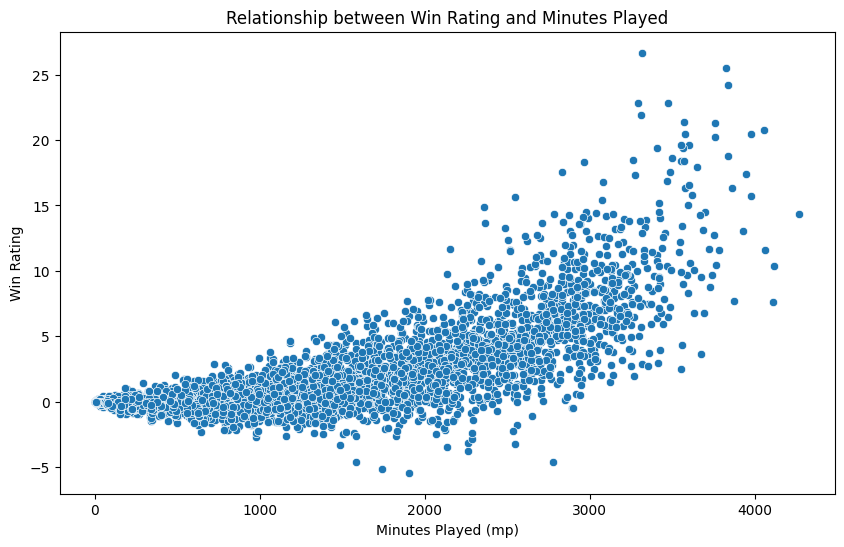

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nba_data['mp'], y=nba_data['win_rating'])
plt.title('Relationship between Win Rating and Minutes Played')
plt.xlabel('Minutes Played (mp)')
plt.ylabel('Win Rating')
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [9]:
min_score = min(cv_results['test_score'])
print(min_score)

0.5344790822272503


❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [10]:
max_score = max(cv_results['test_score'])
print(max_score)

0.5791776193355004


❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [11]:
mean_score = cv_results['test_score'].mean()
print(mean_score)

0.556730180006891


ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [16]:
import numpy as np


total_computational_times = []
mean_scores = []

# Iterating over K values from 2 to 20
for k in range(2, 21):
    # Performing K-fold cross-validation
    cv_results_k = cross_validate(model, X, y, cv=k)
    
    # Calculating total computational time (fitting and scoring) for this K
    total_time = np.sum(cv_results_k['fit_time'] + cv_results_k['score_time'])
    total_computational_times.append(total_time)
    
    # Calculating mean score for this K
    mean_score_k = np.mean(cv_results_k['test_score'])
    mean_scores.append(mean_score_k)

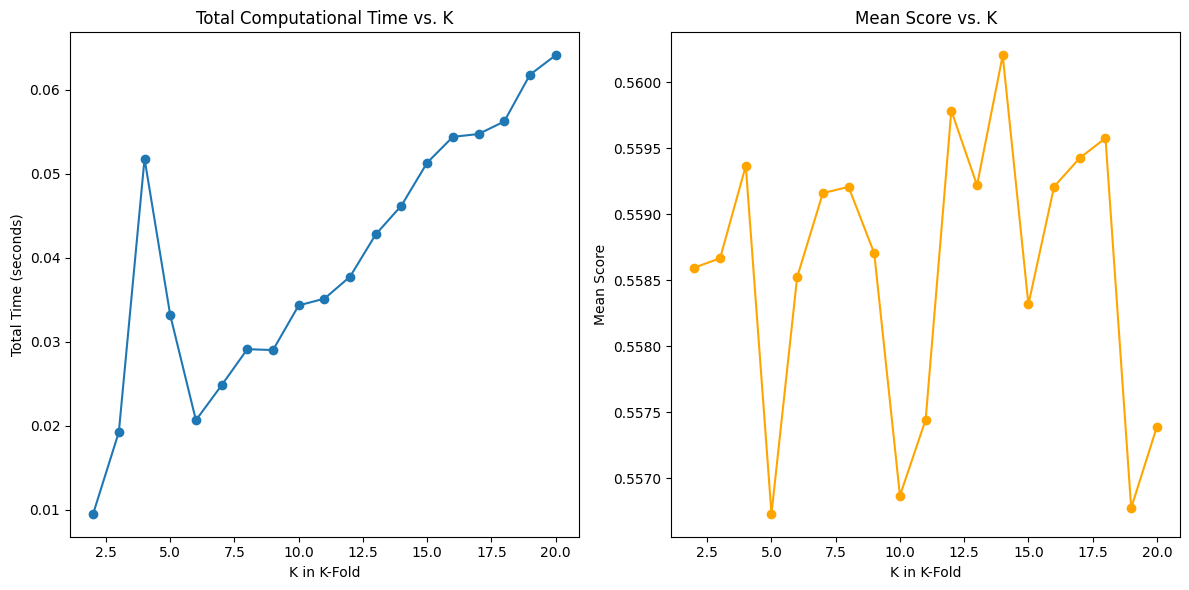

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 21), total_computational_times, marker='o')
plt.title('Total Computational Time vs. K')
plt.xlabel('K in K-Fold')
plt.ylabel('Total Time (seconds)')
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), mean_scores, marker='o', color='orange')
plt.title('Mean Score vs. K')
plt.xlabel('K in K-Fold')
plt.ylabel('Mean Score')
plt.tight_layout()
plt.show()

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [18]:
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [22]:
slope = model.coef_[0]
print(slope)

0.002602579938640193


❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [23]:
intercept = model.intercept_
print(intercept)

-1.5463749371639444


🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [25]:
prediction = model.predict([[1000]])
print(prediction)

[1.056205]


/Users/francoisgirard/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

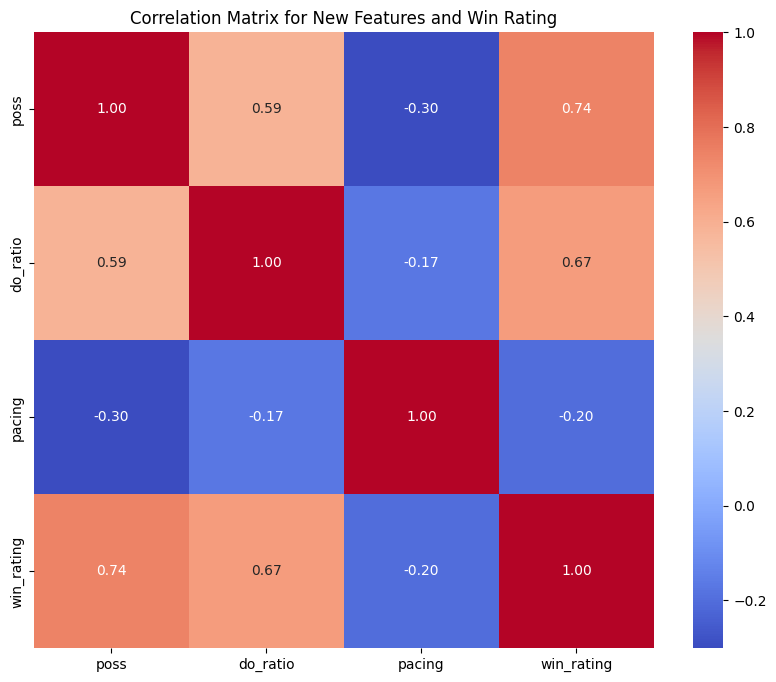

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = nba_data[['poss', 'do_ratio', 'pacing', 'win_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for New Features and Win Rating')
plt.show()

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [28]:
new_features = nba_data[['mp', 'poss']]
print(new_features)

        mp  poss
0     2409  4847
1     2708  5582
2     2407  4976
3      585  1178
4     2056  4534
...    ...   ...
3995   565  1224
3996  1785  3564
3997   378   706
3998   156   289
3999  2912  5733

[4000 rows x 2 columns]


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


new_features = nba_data[['mp', 'poss', 'do_ratio', 'pacing']]
new_model = LinearRegression()
mean_2_feat_score = cross_val_score(new_model, new_features, y, cv=5).mean()

### ☑️ Test your code

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁